C:\Users\Juan Valenzuela\AppData\Local\Temp\ipykernel_9612\2017357197.py:31: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset = dataset.drop('is_train', 1)
C:\Users\Juan Valenzuela\AppData\Local\Temp\ipykernel_9612\2017357197.py:39: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset = dataset.drop('is_train', 1)
C:\Users\Juan Valenzuela\AppData\Local\Temp\ipykernel_9612\2017357197.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha="right")


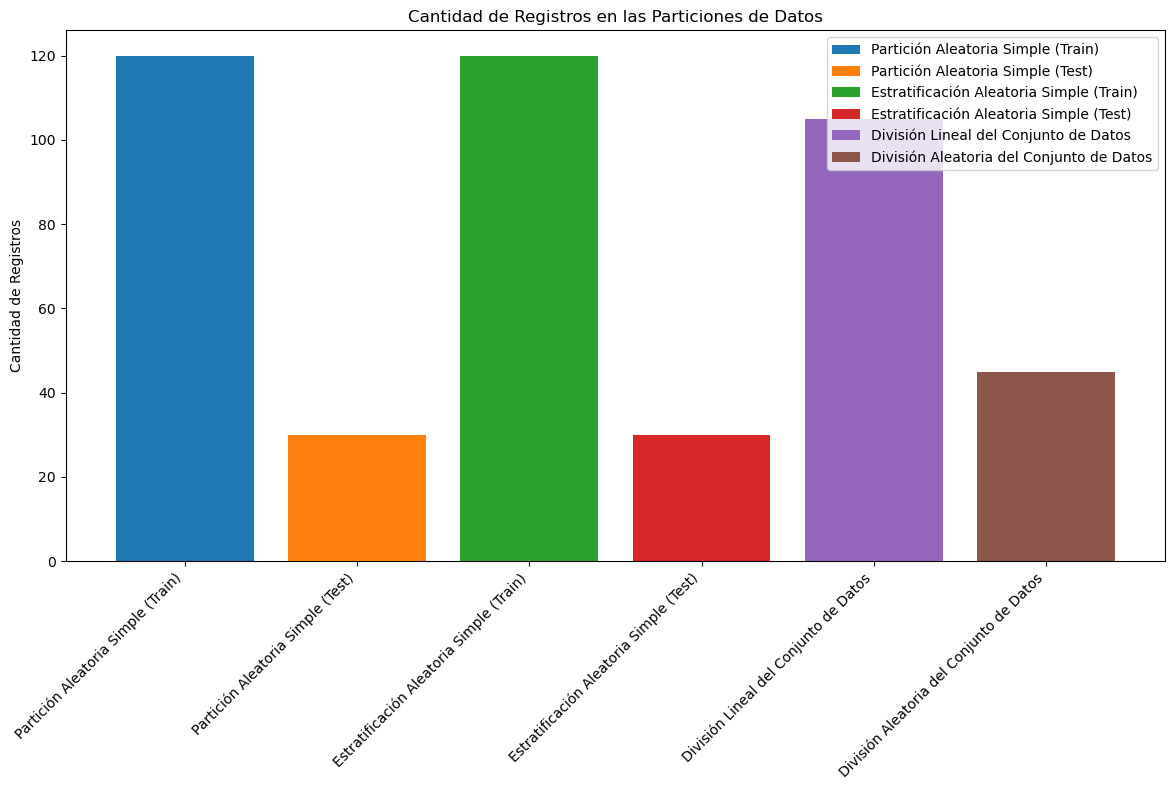

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, LeaveOneOut

# Cargar el dataset sin encabezados
dataset = pd.read_csv('irisbin.csv', header=None)

# Método 1: Partición Aleatoria Simple
train_simple, test_simple = train_test_split(dataset, test_size=0.2, random_state=42)

# Método 2: Estratificación Aleatoria Simple
train_stratified, test_stratified = train_test_split(dataset, test_size=0.2, random_state=42)

#Metodo 3: División lineal del conjunto de datos
p_train = 0.80  # Porcentaje de train.

# Calcular el índice de corte para la partición
cut_index = int(len(dataset) * p_train)

# Dividir el dataset en conjuntos de entrenamiento y prueba
train = dataset[:cut_index]
test = dataset[cut_index:]

#Metodo 4: División aleatoria del conjunto de datos

p_train = 0.70 # Porcentaje de train.

dataset['is_train'] = np.random.uniform(0, 1, len(dataset)) <= p_train
train, test = dataset[dataset['is_train']==True], dataset[dataset['is_train']==False]
dataset = dataset.drop('is_train', 1)

#Metodo 5:División aleatoria con train_test_split()

train, test = train_test_split(dataset, test_size = 0.30)

dataset['is_train'] = np.random.uniform(0, 1, len(dataset)) <= p_train
train, test = dataset[dataset['is_train'] == True], dataset[dataset['is_train'] == False]
dataset = dataset.drop('is_train', 1)

# Método 5: División aleatoria con train_test_split()
train, test = train_test_split(dataset, test_size=0.30)

# Etiquetas para los métodos
labels = ['Partición Aleatoria Simple (Train)', 'Partición Aleatoria Simple (Test)',
          'Estratificación Aleatoria Simple (Train)', 'Estratificación Aleatoria Simple (Test)',
          'División Lineal del Conjunto de Datos', 'División Aleatoria del Conjunto de Datos']

# Crear una figura y ejes para las gráficas
fig, ax = plt.subplots(figsize=(12, 8))

# Crear barras para cada partición
for i, partition in enumerate(partitions):
    ax.bar(labels[i], len(partition), label=labels[i])

# Configuración de la gráfica
ax.set_ylabel('Cantidad de Registros')
ax.set_title('Cantidad de Registros en las Particiones de Datos')
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()